# LAB 1 : Realisation of Logic Gates and Linear Regression Equation

Name : Girish Kumar Gupta

Roll Number : 211022002

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana



#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.  
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



=== Answers ===

1.  Truth table of the logic gates.

|  x1     |  x2     | x1 NAND x2 | x1 NOR x2 | x1 XOR x2 | 
|---------|:---------|:-----------|:----------|:----------|
|  0      |   0     |      1     |     1     |     0     |
|  0      |   1     |      1     |     0     |     1     |
|  1      |   0     |      1     |     0     |     1     |
|  1      |   1     |      0     |     0     |     0     |  

2. Objective : Implementing NAND, NOR, XOR logic gates using McCulloch Pitts Neuron and Rosenblatt's perceptron model.
For MP neuron we have selected weights and bias as following :

|  logic gates   |  weights     | bias | 
|----------------|:--------------|:-----|
|  NAND          |   1,1        |   1   |
|  NOR           |   2,2        |   2   | 
|  XOR           |   1,-1       |   1   | 

3. For MP neuron model the weights are fixed and there is no learning method available, so we have to set the weights manually to get the desired output.
4. In case of Rosenblatt's perceptron model, it has ability to learn the weights and update it iteratively. The update made is based on the error calculted as difference between true output and predicted output.

*   $δ = b - s$ , where b is true output and s is predicted output.
*   Weight update equation is $w_{i+1} = w_{i} + 𝚫w$
*   $𝚫w = ηδa_{i}$, where $η$ is learning rate, $a$ is input.









## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Part A : MP model

import numpy as np
import matplotlib.pyplot as plt


def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  def activation(dot_product, bias):
    if dot_product <= bias:
      return 1
    else:
      return 0

  def activationXOR(dot_product, bias):
    if np.abs(dot_product) == bias:
      return 1
    else:
      return 0      

  if gate == "NAND":

    ## Write your code here
    weight = [1,1]
    bias = 1
    out = activation(x @ weight , bias)

  if gate == "NOR":

    ## Write your code here
    weight = [2,2]
    bias = 1
    out = activation(x @ weight , bias)
  
  if gate == "XOR":

    ## Write your code here
    weight = [1,-1]
    bias = 1
    out = activationXOR(x @ weight , bias)
  
  return out


inp_list = [[0,0],[0,1],[1,0],[1,1]] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates = ['NAND','NOR',"XOR"] ## Create a list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(np.array(inp),gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0
Results for NOR gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  0
Input is : [1, 0]
Logic Gate output is :  0
Input is : [1, 1]
Logic Gate output is :  0
Results for XOR gate : 
Input is : [0, 0]
Logic Gate output is :  0
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0


Weights for NAND gate :  [[ 0.1 -0.1 -0.1]]


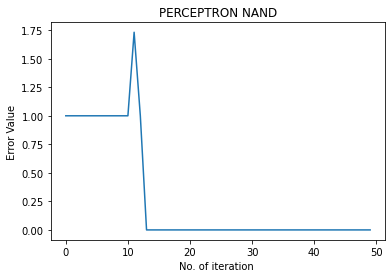

Weights for NOR gate :  [[ 0.1 -0.2 -0.2]]


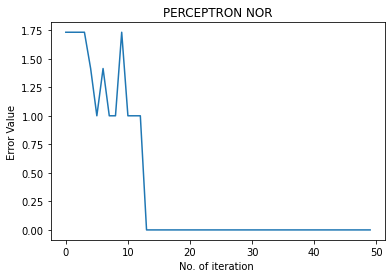

Weights for XOR gate :  [[8.32667268e-17 1.00000000e-01 1.00000000e-01]]


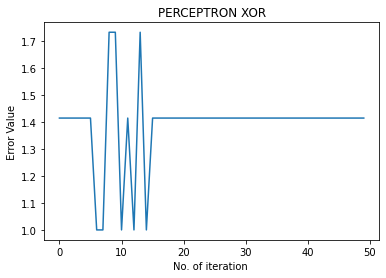

In [ ]:
## Part B : Rosenblatt's Perceptron

import numpy as np
import matplotlib.pyplot as plt

def rosenblatt_perceptron(inp_list,output,learning_rate,w_initial,num_epochs,gate):

  error = []
  itr = []
  inputs= np.matrix(np.insert(inp_list, 0, np.ones(4), axis=1))
  w_new = w_initial

  for epoch in range(num_epochs):
    itr.append(epoch)
    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates
    # for inn,out in zip(inputs,output):
      
    #   prediction = np.heaviside(inn@w_new.T,1)
    #   err= float(out-prediction)
     
    #   del_w= learning_rate*err*inn
    #   w_new= w_new+del_w
    prod = inputs@w_new.T
    pred_out = np.heaviside(prod,0.1)
    # print(pred_out)
    err = (output - pred_out)
    # print(err.shape)
    error.append(np.linalg.norm(err))
    del_w = learning_rate*(err.T@inputs)
    w_new= w_new+del_w
  
  print('Weights for ' + gate + ' gate : ',w_new)
  # print(np.shape(error))
  plt.plot(itr,error)
  plt.title('PERCEPTRON '+gate)
  plt.xlabel('No. of iteration ')
  plt.ylabel(' Error Value ')
  plt.show()
  return w_new,error

inp_list = np.matrix([[0,0],[0,1],[1,0],[1,1]])  ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
nand_output = np.matrix([1,1,1,0]).T  ## Define NAND gate target output
nor_output = np.matrix([1,0,0,0]).T   ## Define NOR gate target output
xor_output = np.matrix([0,1,1,0]).T ## Define XOR gate target output

learning_rate = 0.1## Define a learning rate
w_initial = np.matrix([1,1,1])## Initialise weights
num_epochs = 50## Set number of epochs

## For NAND gate
# plt.subplot(3,1,1)
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")

## For NOR gate
# plt.subplot(3,1,2)
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")

## For XOR gate
# plt.subplot(3,1,3)
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")


## Inferences and Conclusion : State all the key observations and conclusion

=== Answers ===


1.   In MP model we have to hard code weights, bias, and activation function as there is no learning method available.
2.   In Rosenblatt's perceptron, weights can be learned by considering the error and updating iteratively to minimize the error.
3.   Single perceptron can learn only for the linearly separable data, and hence weights for non-linearly separable data can not be obtained by single perceptron (i.e. for XOR gate). 
4.   We can use multi layer perceptron to realise non-linearly separable data.



# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Write down the Objectives, Hypothesis and Experimental description for the above problem

=== Answers ===


1.   Objective : Implementing Widrow's Adaline model for given linear equation.
2.   Hypothesis : Widrow’s Adaline model is similar to Rosenblatt's perceptron model except the activation function ($f(x) = x$) here is linear instead of sigmoid or hardlimiting.
3.   Adaline model also can learn the weights similar to perceptron model, where error which is mininmize is mean square error.


*   $δ = (b - s)$ , where b is true output and s is predicted output and N is total number of samples.
*   Weight update equation is $w_{i+1} = w_{i} + 𝚫w$
*   $𝚫w = ηδa_{i}$, where $η$ is learning rate, $a$ is input.





## Programming : 
  Please write a program to demonstrate the same

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add


Weights for Learning rate 0.9 is :  [[nan]
 [nan]
 [nan]]


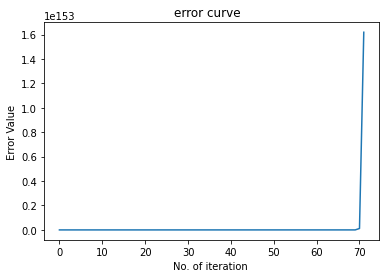

Weights for Learning rate 0.0001 is :  [[1.56864561]
 [1.48737704]
 [1.44296806]]


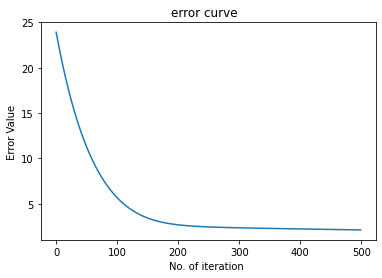

Weights for Learning rate 1e-05 is :  [[1.0038187 ]
 [0.96111349]
 [0.94812729]]


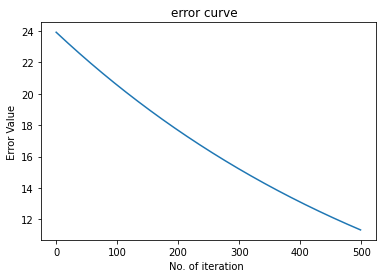

In [ ]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations


def widrow_adaline(inp,learning_rate,w_initial,num_epochs,output,N):

  error = []
  itr=[]
  w_new = w_initial
  # print(w_new.shape)
  # print(w_initial.shape)
  for epoch in range(num_epochs):
    itr.append(epoch)
    ## Write the learning(training) loop here and return the new weights, also save the error after each iteration
    pred_out= np.dot(inp.T,w_new)
    err = (output-pred_out)
    error.append(np.linalg.norm(err))
    # print(np.shape(err))
    del_w = learning_rate*np.dot(inp,err)
    w_new = w_new+del_w
  
  print('Weights for Learning rate' , learning_rate , 'is : ' , w_new)
  # print(np.shape(error))
  plt.plot(itr,error)
  plt.title('error curve  ')
  plt.xlabel('No. of iteration ')
  plt.ylabel(' Error Value ')
  plt.show()

  return w_new,error  


N = 100  ## Set the number of input points 
learning_rate = [0.9, 0.0001, 0.00001] ## Define a learning rate
w_initial = np.matrix([0.2, 0.5, 0.5 ]).T ## Initialise weights
num_epochs = 500 ## Set number of epochs

## Generate the input below 
x1=np.array(np.random.uniform(0,1,N))
x2=np.array(np.random.uniform(0,1,N))
y = 1 + 2*x1 + 2*x2

inp = np.matrix([np.ones(100), x1 , x2 ])## An input array of the shape (3,100)
output = np.matrix(y).T
for lr in learning_rate:
  w_new,error = widrow_adaline(inp,lr,w_initial,num_epochs,output,N)


Weights for Learning rate 0.09 is :  [[nan]
 [nan]
 [nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add


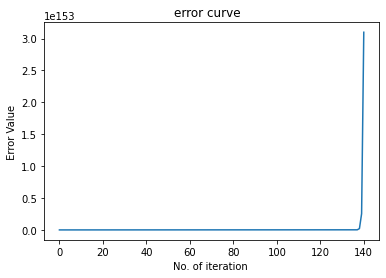

Weights for Learning rate 0.001 is :  [[1.05493676]
 [1.93399022]
 [1.95631604]]


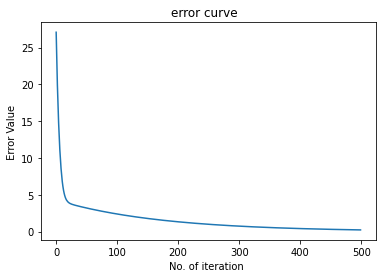

Weights for Learning rate 0.0001 is :  [[1.7518744 ]
 [1.05600479]
 [1.44228578]]


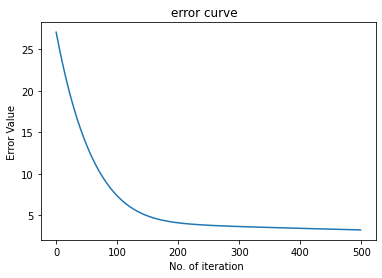

In [ ]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations


def widrow_adaline(inp,learning_rate,w_initial,num_epochs,output,N):

  error = []
  itr=[]
  w_new = w_initial
  # print(w_new.shape)
  # print(w_initial.shape)
  for epoch in range(num_epochs):
    itr.append(epoch)
    ## Write the learning(training) loop here and return the new weights, also save the error after each iteration
    pred_out= np.dot(inp.T,w_new)
    err = (output-pred_out)
    error.append(np.linalg.norm(err))
    # print(np.shape(err))
    del_w = learning_rate*np.dot(inp,err)
    w_new = w_new+del_w
  
  print('Weights for Learning rate' , learning_rate , 'is : ' , w_new)
  # print(np.shape(error))
  plt.plot(itr,error)
  plt.title('error curve  ')
  plt.xlabel('No. of iteration ')
  plt.ylabel(' Error Value ')
  plt.show()

  return w_new,error  


N = 100  ## Set the number of input points 
learning_rate = [0.09, 0.001, 0.0001] ## Define a learning rate
w_initial = np.matrix([0.2, -0.2, 0.4 ]).T ## Initialise weights
num_epochs = 500 ## Set number of epochs

## Generate the input below 
x1=np.array(np.random.uniform(0,1,N))
x2=np.array(np.random.uniform(0,1,N))
y = 1 + 2*x1 + 2*x2

inp = np.matrix([np.ones(100), x1 , x2 ])## An input array of the shape (3,100)
output = np.matrix(y).T
for lr in learning_rate:
  w_new,error = widrow_adaline(inp,lr,w_initial,num_epochs,output,N)

Weights for Learning rate 0.01 is :  [[1.]
 [2.]
 [2.]]


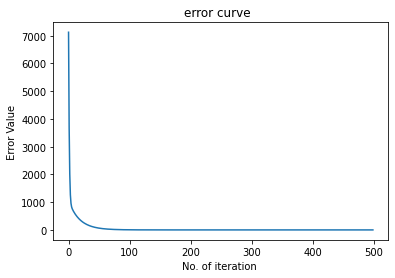

Weights for Learning rate 0.001 is :  [[-16.28291214]
 [ 22.07319387]
 [ 15.06763582]]


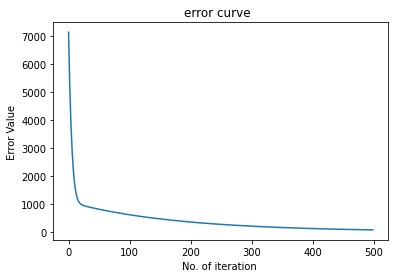

Weights for Learning rate 0.0001 is :  [[-200.36483092]
 [ 194.65599396]
 [ 201.96564313]]


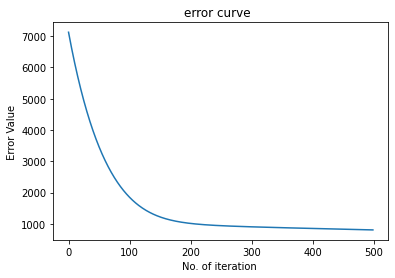

In [ ]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations


def widrow_adaline(inp,learning_rate,w_initial,num_epochs,output,N):

  error = []
  itr=[]
  w_new = w_initial
  # print(w_new.shape)
  # print(w_initial.shape)
  for epoch in range(num_epochs):
    itr.append(epoch)
    ## Write the learning(training) loop here and return the new weights, also save the error after each iteration
    pred_out= np.dot(inp.T,w_new)
    err = (output-pred_out)
    error.append(np.linalg.norm(err))
    # print(np.shape(err))
    del_w = learning_rate*np.dot(inp,err)
    w_new = w_new+del_w
  
  print('Weights for Learning rate' , learning_rate , 'is : ' , w_new)
  # print(np.shape(error))
  plt.plot(itr,error)
  plt.title('error curve  ')
  plt.xlabel('No. of iteration ')
  plt.ylabel(' Error Value ')
  plt.show()

  return w_new,error  


N = 100  ## Set the number of input points 
learning_rate = [0.01, 0.001, 0.0001] ## Define a learning rate
w_initial = np.matrix([200, 500, 500 ]).T ## Initialise weights
num_epochs = 500 ## Set number of epochs

## Generate the input below 
x1=np.array(np.random.uniform(0,1,N))
x2=np.array(np.random.uniform(0,1,N))
y = 1 + 2*x1 + 2*x2

inp = np.matrix([np.ones(100), x1 , x2 ])## An input array of the shape (3,100)
output = np.matrix(y).T
for lr in learning_rate:
  w_new,error = widrow_adaline(inp,lr,w_initial,num_epochs,output,N)

## Inferences and Conclusion : State all the key observations and conclusion

=== Answers ===


1.   For higher learning rate and it converges very fast, and can diverges.
2.   For sufficiently small learning rate the model learns the weights without taking the mean of the error also.
3.   For very small learning rate the models learns the weights but the process is very slow.
4.   For different weight initialisation the model converges with different speed but model was not  affected much.

